# Polinomial linear Regression
$$ Y = b_0 + b_1X_1 + b_2X_1^2 + ... + b_nX_1^n $$
where, **X<sub>1</sub>** : predictor variable , and b's are different coefficent of regression for the same predictor. 
![polynomial regression image](https://serokell.io/files/ka/kawer8rc.5_(5).png)
- Polinomial regression is a Special case of Multiple linear regression.

### Importing the libraries and dataset.

In [112]:
import pandas as pd 
import numpy as np 
import math
import matplotlib.pyplot as plt                 

In [113]:
dataset = pd.read_csv('./reg_dataset/Position_Salaries.csv')

X = dataset.iloc[:, 1].values
Y = dataset.iloc[:, -1].values

# The fit & predict methord excepts 2D-arrays
X = np.reshape(X,(-1,1))
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [114]:
Y = np.reshape(Y,(-1,1))
print(Y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


### Training whole dataset using 'Linear regression'

In [115]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X,Y)

# predicting the salary for a Region manager(6) with 7 years experience
result_lin = linear_reg.predict([[6.5]])
print(result_lin)

[[330378.78787879]]


### Note:
As we can see hear,
the linear model Predicted '330379' for a region manager (6.5), which is greater then Partner(7) ->300000
<br>**Regression model is not Best suited for this data set.**

### Training whole dataset using Polynomial regression

In [116]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
X_dig2 = poly_reg.fit_transform(X)
print(X_dig2)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


In [117]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_dig2,Y)

level = [[6.5]]

# to Predict Using Polynomial Regression, Convert the Test variables to Polynomial as well
var = poly_reg.fit_transform(level)
result_poly = lin_reg2.predict(var)
print(f'predicted {result_poly} for level {level}')

predicted [[189498.10606061]] for level [[6.5]]


### Note:
Here, we got ( 189498.10 ) for level 6.5 , where range( 150000 (6) to 300000 (7)). <br>
This is far more Accurate then Predicted using linear Regression i.e (330378.78)

### Visualising The Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

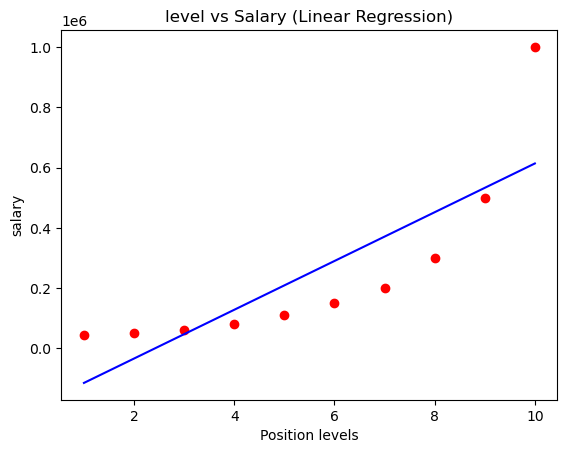

In [118]:
plt.title('level vs Salary (Linear Regression)')
plt.xlabel('Position levels')
plt.ylabel('salary')
plt.scatter(X,Y, color='red')

y_lin = linear_reg.predict(X)
plt.plot(X,y_lin, color='blue')
plt.show

### Visualising the dataset using Polynomial regression

<function matplotlib.pyplot.show(close=None, block=None)>

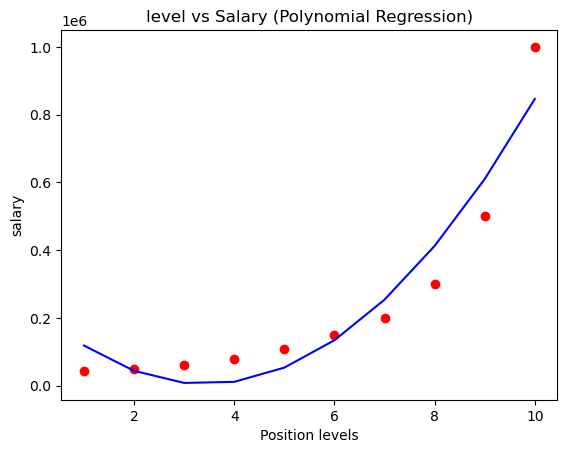

In [119]:
plt.title('level vs Salary (Polynomial Regression)')
plt.xlabel('Position levels')
plt.ylabel('salary')
plt.scatter(X,Y, color='red')

y_poly = lin_reg2.predict(X_dig2) # X_dig2 is polynomial matrix for X
plt.plot(X,y_poly, color='blue')
plt.show

Here,<br>
Polynomial Regression predicts the dataset better compared to Linear regression.
<hr>

**Increasing the degree of freedom would Increase the Accuracy of Prediction To a point where The Model becomes OVER FITED**

In [133]:
# testing with Degree 4 poloynomial matrix
poly_reg = PolynomialFeatures(degree=4)
X_dig3 = poly_reg.fit_transform(X)
lin_reg3 = LinearRegression()
lin_reg3.fit(X_dig3,Y)

level = [[6]]

# to Predict Using Polynomial Regression, Convert the Test variables to Polynomial as well
var = poly_reg.fit_transform(level)
result_poly = lin_reg3.predict(var)
print(f'predicted salary {result_poly} for level {level} where real salary is {Y[level[0][0]-1]}')

predicted salary [[143275.05827509]] for level [[6]] where real salary is [150000]


### Note:
Prediction after using a 4 degree polinimial is so accurate that the model seams to be over fited.
### Visualising 4 degree polynomial

<function matplotlib.pyplot.show(close=None, block=None)>

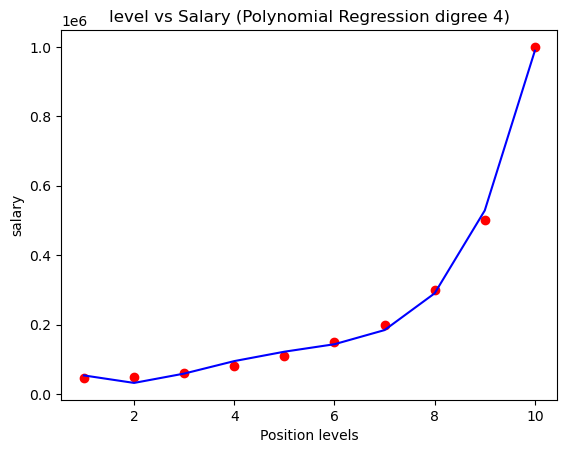

In [121]:
plt.title('level vs Salary (Polynomial Regression digree 4)')
plt.xlabel('Position levels')
plt.ylabel('salary')
plt.scatter(X,Y, color='red')

y_poly = lin_reg3.predict(X_dig3) # X_dig2 is polynomial matrix for X
plt.plot(X,y_poly, color='blue')
plt.show

The ablove graph has been created by connecting integer values, which results in uneven curve. <br>
It can be smoothed using smaller float interval in between. 

<function matplotlib.pyplot.show(close=None, block=None)>

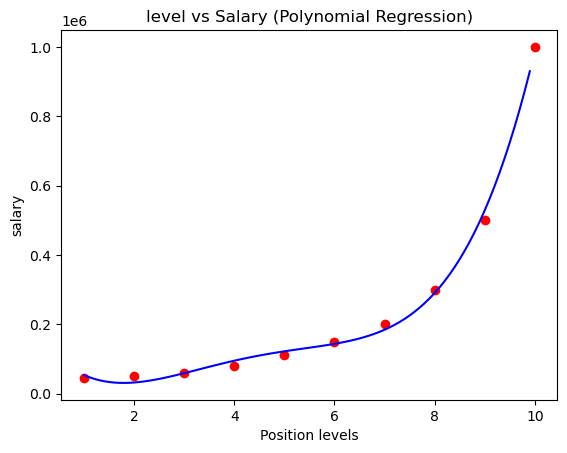

In [126]:
x_grid = np.arange(min(X), max(X), 0.1) # 10x10 grid with interval value+0.1 
x_grid = x_grid.reshape(len(x_grid), 1) # all values in 1 column

x_poly = poly_reg.fit_transform(x_grid)
y_poly = lin_reg3.predict(x_poly)

# Plotting the graph
plt.title('level vs Salary (Polynomial Regression)')
plt.xlabel('Position levels')
plt.ylabel('salary')
plt.scatter(X,Y, color='red')

plt.plot(x_grid,y_poly, color='blue')
plt.show